In [ ]:
!pip install pandas numpy matplotlib statsmodels scikit-learn
!pip install pandas numpy matplotlib statsmodels scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [ ]:
datos = pd.read_csv('/content/MXvideos_cc50_202101 (2).csv')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


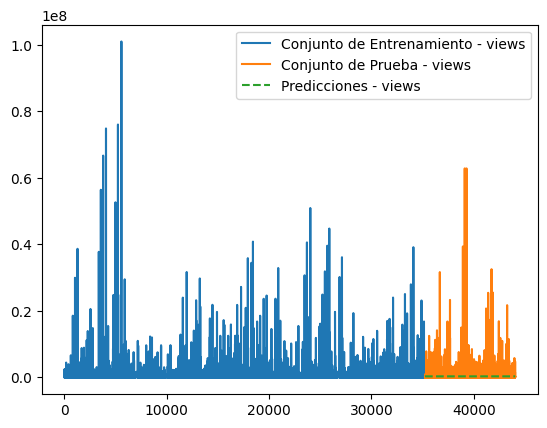

Error Cuadrático Medio (MSE) para views: 2509214198241.614


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


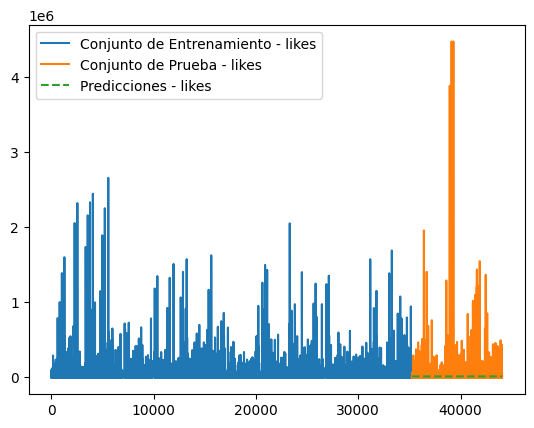

Error Cuadrático Medio (MSE) para likes: 10685156375.73603


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


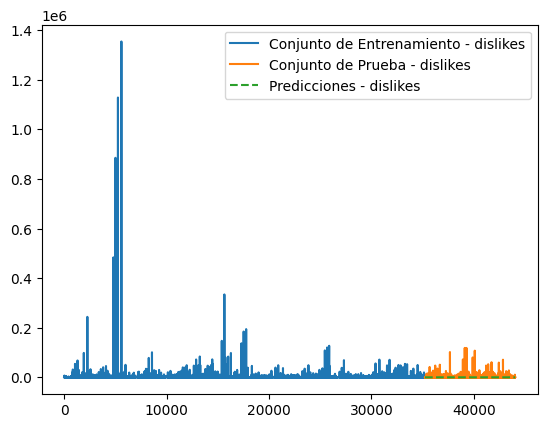

Error Cuadrático Medio (MSE) para dislikes: 13780750.973012442


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


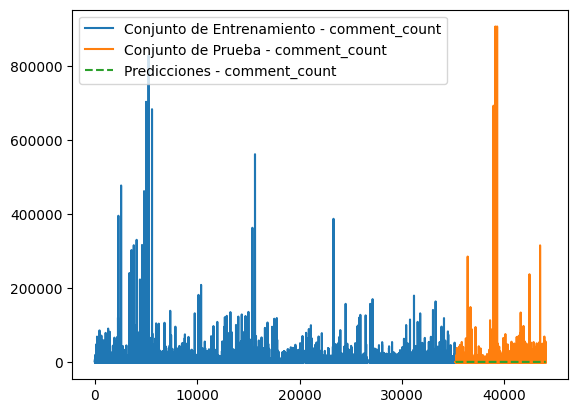

Error Cuadrático Medio (MSE) para comment_count: 307744541.17567974


In [ ]:
variables_objetivo = ['views', 'likes', 'dislikes', 'comment_count']

for variable in variables_objetivo:
    serie_temporal = datos[variable]
    serie_temporal = serie_temporal.fillna(serie_temporal.mean())
    train_size = int(len(serie_temporal) * 0.8)
    train, test = serie_temporal[0:train_size], serie_temporal[train_size:]
    modelo_arima = ARIMA(train, order=(3, 1, 2))
    modelo_entrenado = modelo_arima.fit()
    predicciones = modelo_entrenado.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
    plt.plot(train, label=f'Conjunto de Entrenamiento - {variable}')
    plt.plot(test, label=f'Conjunto de Prueba - {variable}')
    plt.plot(predicciones, label=f'Predicciones - {variable}', linestyle='dashed')
    plt.legend()
    plt.show()

    mse = mean_squared_error(test, predicciones)
    print(f'Error Cuadrático Medio (MSE) para {variable}: {mse}')


In [ ]:
for variable in variables_objetivo:
    r2 = r2_score(test, predicciones)
    print(f'R^2 para {variable}: {r2}')

R^2 para views: -0.0013794142901299988
R^2 para likes: -0.0013794142901299988
R^2 para dislikes: -0.0013794142901299988
R^2 para comment_count: -0.0013794142901299988


In [ ]:
for variable in variables_objetivo:
    mae = mean_absolute_error(test, predicciones)
    print(f'MAE para {variable}: {mae}')

MAE para views: 2572.733974029779
MAE para likes: 2572.733974029779
MAE para dislikes: 2572.733974029779
MAE para comment_count: 2572.733974029779


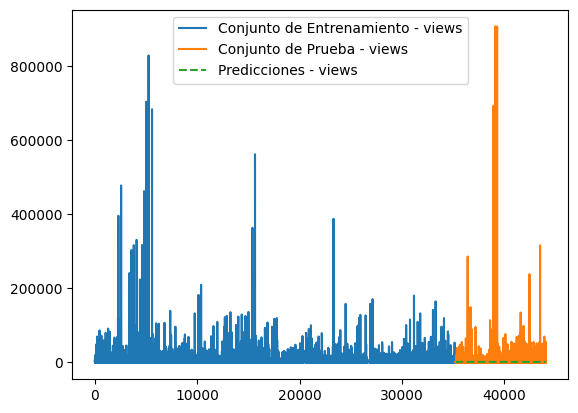

In [ ]:
plt.plot(train, label=f'Conjunto de Entrenamiento - {variable}')
plt.plot(test, label=f'Conjunto de Prueba - {variable}')
plt.plot(predicciones, label=f'Predicciones - {variable}', linestyle='dashed')
plt.legend()
plt.show()